## Isabella Salgado - 201730418

## Juan Pablo Naranjo - 201730006

# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [ ]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [ ]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [ ]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [ ]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, preds))
rs1 = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse1,3)}')
print(f'R^2: {round(rs1,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, preds))
rs2 = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse2,3)}')
print(f'R^2: {round(rs2,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [ ]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [ ]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, preds))
rs3 = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse3,3)}')
print(f'R^2: {round(rs3,3)}\n')

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(y_test, preds))
rs4 = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse4,3)}')
print(f'R^2: {round(rs4,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)

In [ ]:
model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse5 = np.sqrt(mean_squared_error(y_test, preds))
rs5 = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse5,3)}')
print(f'R^2: {round(rs5,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

In [ ]:
model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse6 = np.sqrt(mean_squared_error(y_test, preds))
rs6 = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse6,3)}')
print(f'R^2: {round(rs6,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse7 = np.sqrt(mean_squared_error(y_test, preds))
rs7 = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse7,3)}')
print(f'R^2: {round(rs7,3)}\n')

RMSE: 0.05
R^2: 0.787



## Resumen de los resultados obtenidos

In [ ]:
# Se define el diccionario que contiene la información resumida de los resultados de cada caso.
data = {'Caso': ['1', '2', '3', '4', '5', '6', '7'],
        'Codificación': ['One-Hot', 'Ordinal', 'One-Hot', 'Ordinal', 'Ordinal', 'Ordinal', 'Ordinal'],
        'Scaler': ['Min-Max', 'Min-Max', 'Robust', 'Robust', 'Min-Max', 'Min-Max', 'Min-Max'],
        'RMSE': [np.round(rmse1, 3), np.round(rmse2, 3), np.round(rmse3, 3), np.round(rmse4, 3), np.round(rmse5, 3), np.round(rmse6, 3), np.round(rmse7, 3)],
        'R^2': [np.round(rs1, 3), np.round(rs2, 3), np.round(rs3, 3), np.round(rs4, 3), np.round(rs5, 3), np.round(rs6, 3), np.round(rs7, 3)]}
 
# Se convierte el resultado a un DataFrame.
tabla = pd.DataFrame(data).reset_index(drop=True)
tabla

,Caso,Codificación,Scaler,RMSE,R^2
0,1,One-Hot,Min-Max,0.031,0.917
1,2,Ordinal,Min-Max,0.050,0.787
2,3,One-Hot,Robust,0.277,0.917
3,4,Ordinal,Robust,0.444,0.787
4,5,Ordinal,Min-Max,0.049,0.785
5,6,Ordinal,Min-Max,0.050,0.784
6,7,Ordinal,Min-Max,0.050,0.787


## Notas:

Un $R^2$ más cercano a 1 indica que el modelo de predicción se ajusta perfectamente a los datos, mientras que un valor cercano a 0 indica que no hay relación entre el modelo predicho y los datos.

Un error cuadrático medio (RMSE) más cercano a 0 indica que hay un mejor ajuste del modelo a los datos. Entre más grande sea, menor relación habrá entre los datos y el modelo de predicción.

## Análisis:

De los casos 1 y 2 se puede decir que el One-Hot Encoding tuvo mejores resultados porque las categorías que se están codificando no están relacionadas por algún orden específico. Para este tipo de datos, usar un encoding ordinal conlleva el riesgo de que el modelo de regresión lineal asuma que hay una relación ordinal (tener en cuenta el orden) de los datos. Como en este caso nuestras categorías no están relacionadas ordinalmente, el modelo no se ajusta muy bien usando este método de codificación.

De los casos 3 y 4 se puede notar que sigue habiendo un mejor resultado en términos del $R^2$ para el One-Hot Encoding por la misma razón discutida previamente, aunque se puede notar que para ambos casos el error cuadrático medio subió considerablemente. Esto se puede deber al hecho de que el Robust Scaler es más preciso al momento de escalizar los datos y tiene más en cuenta a los outliers, o datos que se encuentran muy alejados de la media. Esto nos indica que en el caso de nuestro dataset, puede haber muchos outliers haciendo que el error cuadrático medio incremente. Sin embargo, no es un error muy alto. El hecho de que el RMSE sea más alto para la codificación ordinal soporta el hecho de que la codificación One-Hot es más efectiva para nuestro dataset, en el que las categorías no tienen un orden específico entre ellas.

De los casos 5, 6 y 7 se puede decir que el error cuadrático medio y el $R^2$ se mantuvo constante debido al hecho de que se usó el mismo método para escalizar los datos y además el mismo método de codificación. Se puede notar una diferencia muy mínima en el valor del $R^2$ para los tres casos, aunque todos se encuentran en el mismo rango cercano a 0.7. Aunque esta diferencia es mínima, se puede notar la tendencia de que entrenar el modelo con un porcentaje mayor de los datos retorna un $R^2$ más alto. Sin embargo, la diferencia no es tan alta, y el hecho de que el error cuadrático medio se mantenga constante soporta la idea de que la cantidad de datos con la que se entrene el modelo no afecta sustancialmente el coeficiente de determinación del modelo lineal. 


## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [ ]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

## Implementación del algoritmo, evaluación del modelo y gráficas de Resultados
#### (para diferentes valores de la tasa de aprendizaje $\eta_k$)

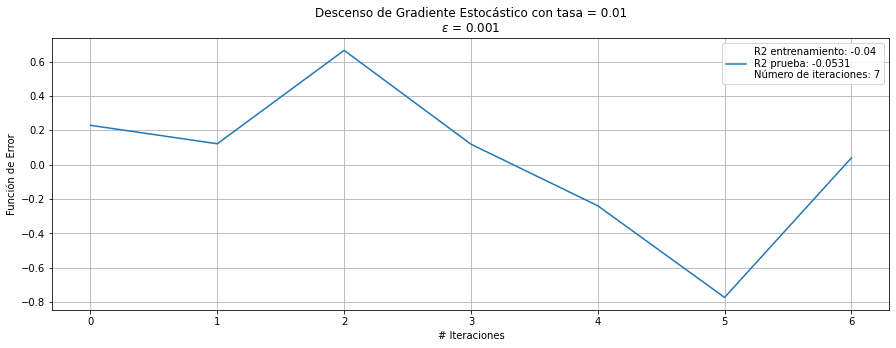

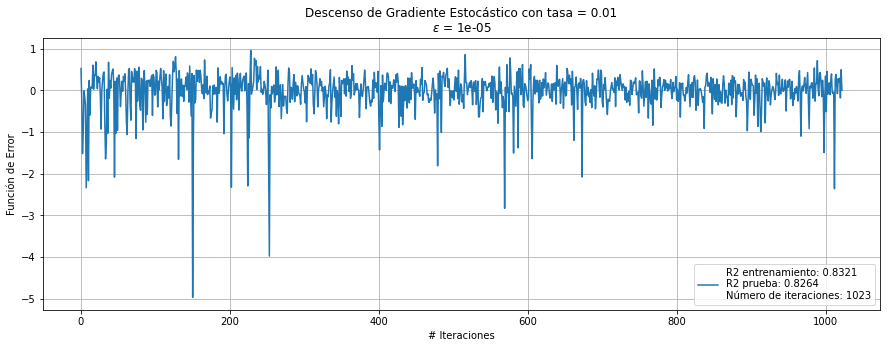

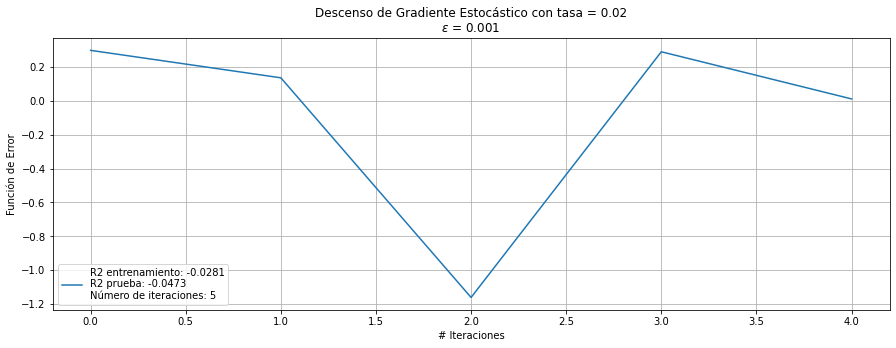

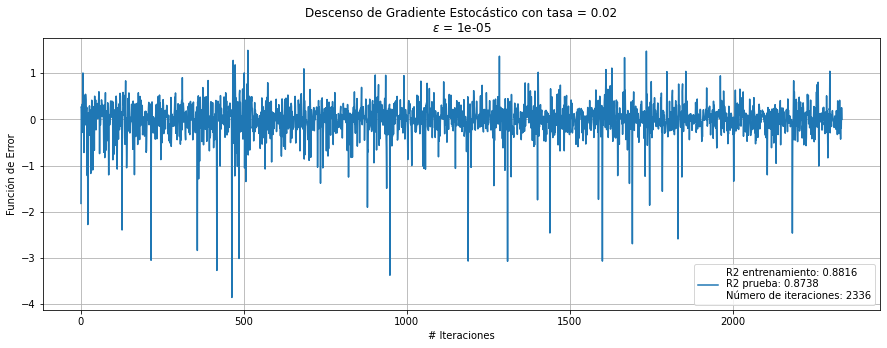

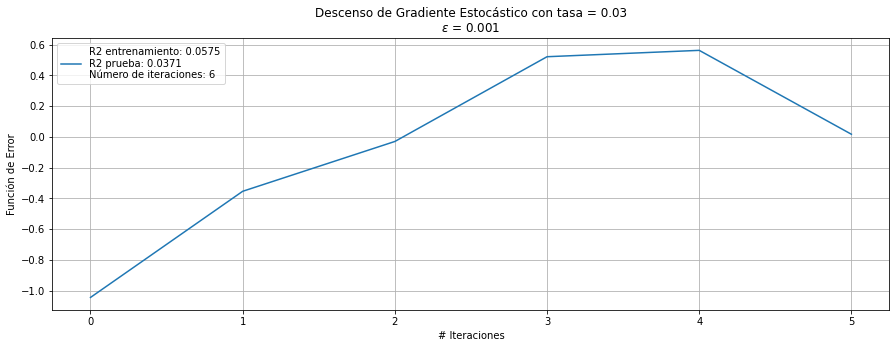

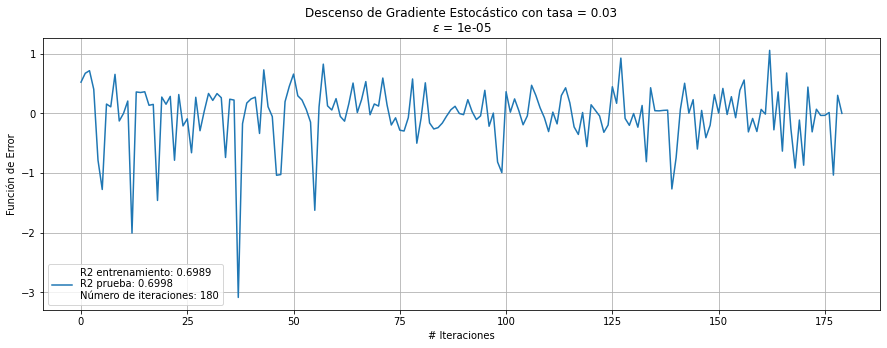

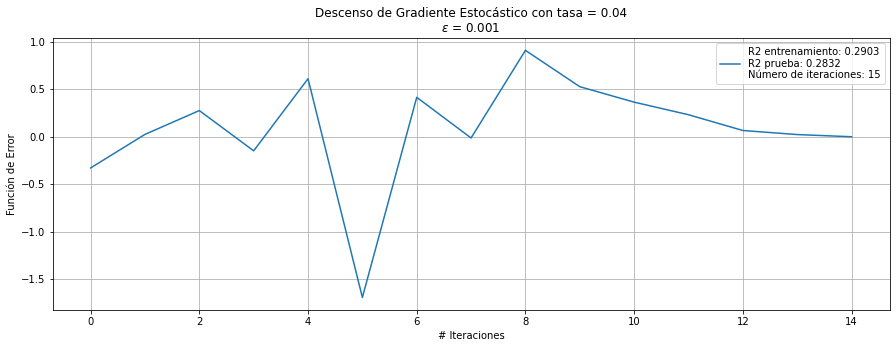

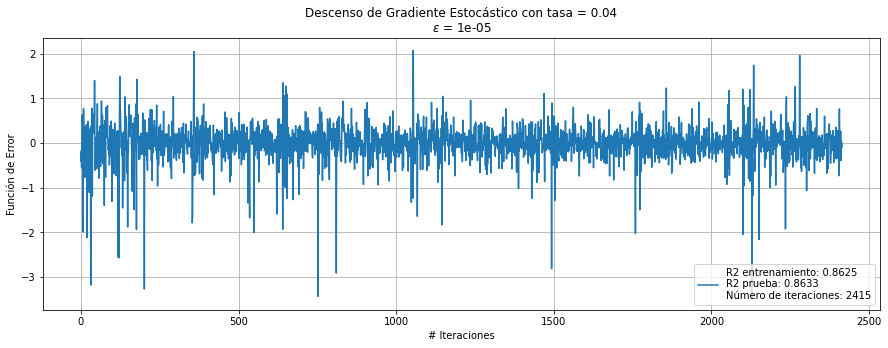

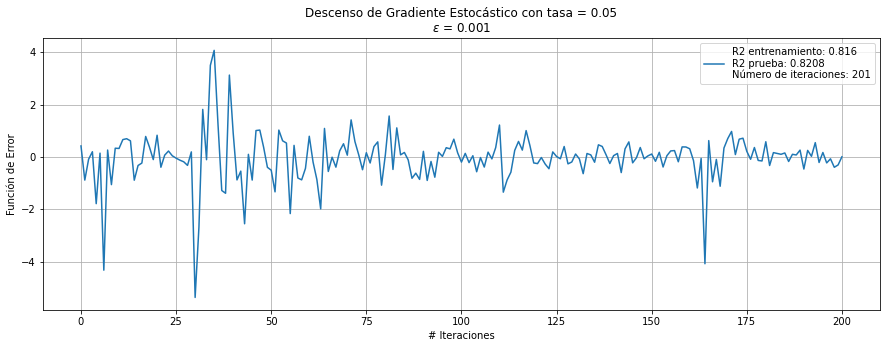

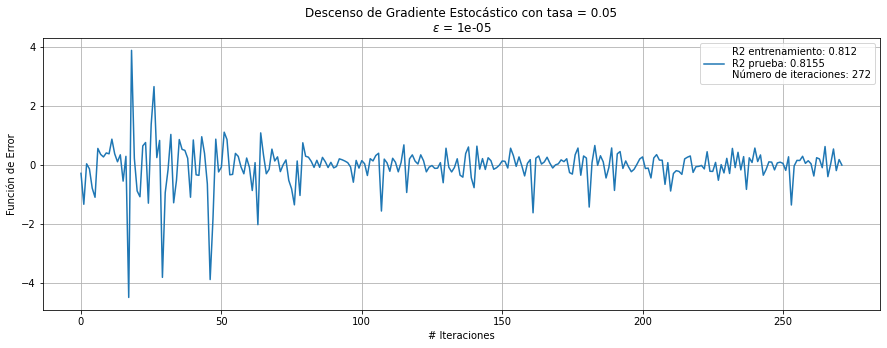

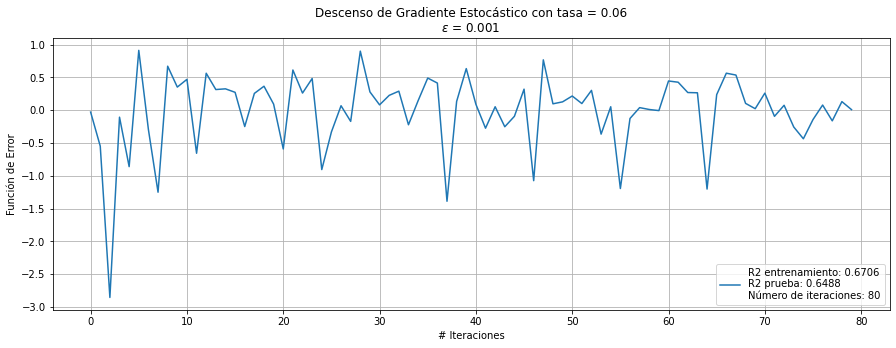

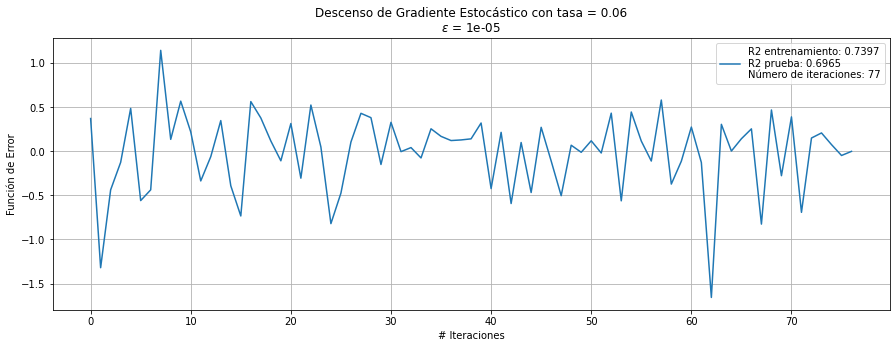

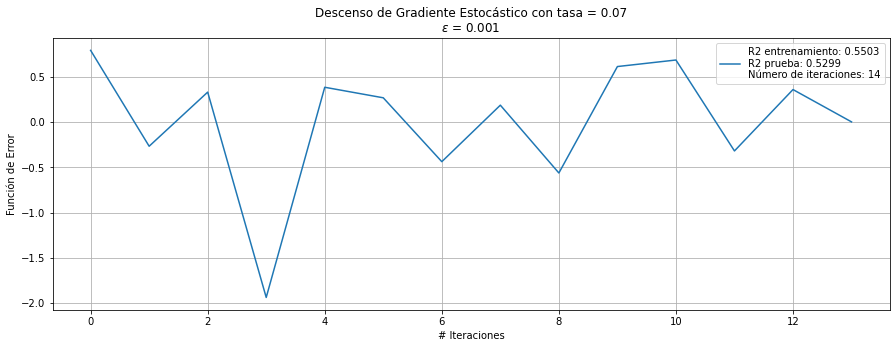

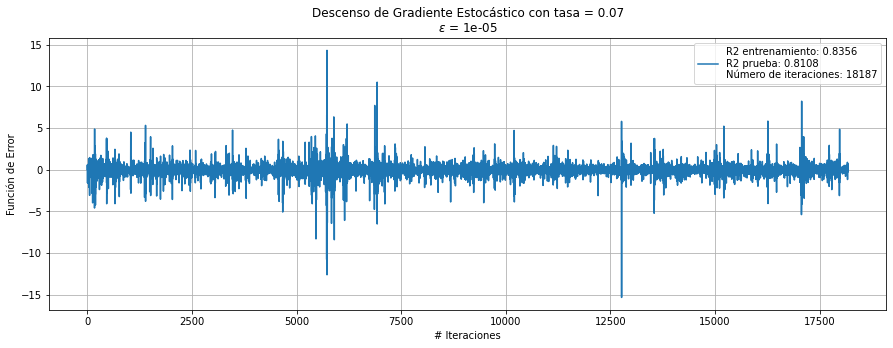

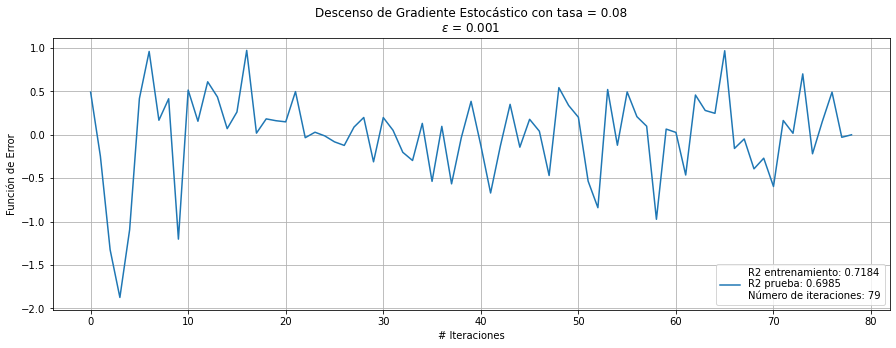

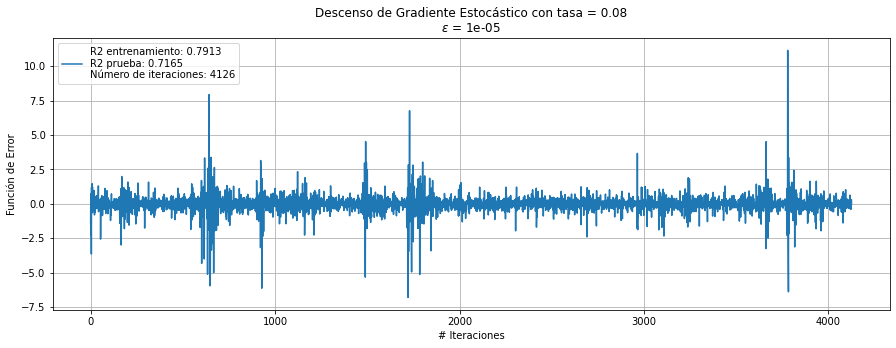

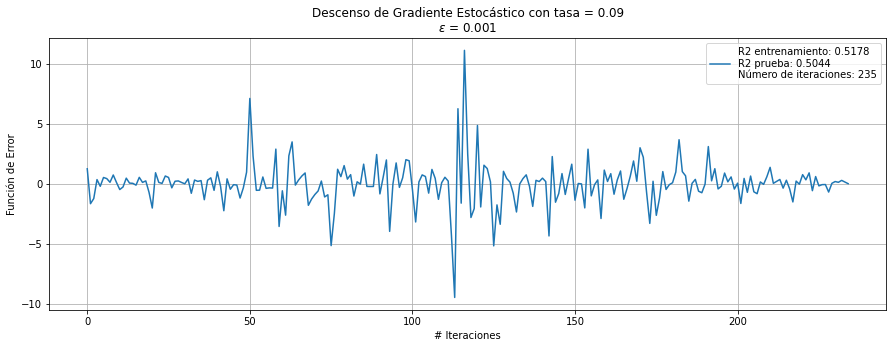

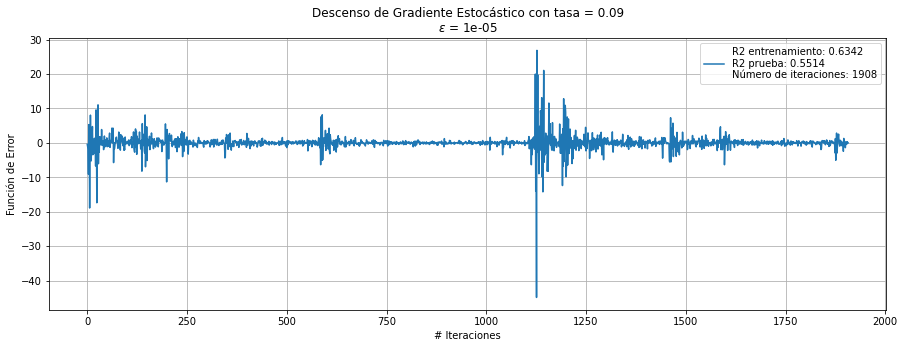

In [ ]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

# Inicialización de valor de la tasa de aprendizaje

# Se crea una lista de tasas, para hacer una comparación de los resultados para diferentes valores de la tasa de apredizaje.
# Se crea una lista de epsilons, para hacer una comparación de los resultados para diferentes valores de la tolerancia del algoritmo.
tasas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
epsilons = [1e-3, 1e-5]

# Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

for tasa in tasas:
    for eps in epsilons:

        # Inicialización de w
        w0 = np.zeros((len(X_train_array[0]), 1)) # Inicializar aleatoriamente #
        w = w0.copy()

        # Inicialización de criterio de parada
        error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
        dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #

        # Ciclo iterativo según algoritmo de descenso de gradiente
        while dif>eps:
            # Desarrollo de algoritmo #

            # Selección de par aleatorio
            i = np.random.randint(low=0, high=y_train_array.shape[0]) # Posición aleatoria #
            xActual = np.matrix(np.array(X_train_array[i])).T
            yActual = np.matrix(np.array(y_train_array[i])).T
            
            # Calcular el gradiente y el error
            grad = np.matmul(w.T, xActual)
            e = grad - yActual
            
            # Calcular el vector de parámetros para la iteración actual
            w_nuevo = w - tasa*float(e)*xActual
            
            # Cálculo de la diferencia entre el w de la iteración actual con el de la anterior
            dif = np.linalg.norm(w-w_nuevo)
            
            # Se agrega el error a la lista de errores
            errores.append(float(e))

            # Actualización del valor de los parámetros
            w = w_nuevo
            
            # # # # # # # # # # # # # #

        # Evaluación del modelo
        y_train_preds = np.zeros(y_train_array.shape)

        for i in range(X_train_array.shape[0]):
            y_train_preds[i] = np.dot(w.T, X_train_array[i])

        y_test_preds = np.zeros(y_test_array.shape)
        for i in range(X_test_array.shape[0]):
            y_test_preds[i] = np.dot(w.T, X_test_array[i])
            
        r2_train = r2_score(y_train_array, y_train_preds)
        r2_test = r2_score(y_test_array, y_test_preds)

        # Gráficas de Resultados
        plt.figure(figsize=(15,5))
        plt.plot(errores)
        plt.xlabel('# Iteraciones')
        plt.ylabel('Función de Error')
        plt.title(f'Descenso de Gradiente Estocástico con tasa = {tasa}\n' + r'$\epsilon$ = ' + f'{eps}')
        plt.legend([f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}\nNúmero de iteraciones: {len(errores)}'])
        plt.grid()

        errores = [] # Vaciar la lista para graficar con la siguiente tasa y epsilon.

- Al estar trabajando con un descenso de gradiente estocástico, la función de error no se va a ir acercando progresivamente hacia cero, ya que los valores son tomados aleatoriamente y no se relacionan directamente con el error de la iteración anterior.

- La elección de la condición inicial ```xActual```, ```yActual``` en cada iteración influye directamente en la convergencia del algoritmo, pues este buscará una solución más cercana dependiendo del punto de partida. 

- En general, se puede notar que tener un $\epsilon$ con valor menor genera un número más grande de iteraciones, pues se necesita que el error sea más pequeño aún para llegar a la condición de terminación. De igual forma, un $\epsilon$ menor genera valores de $R^2$ mucho mayores en comparación con un valor dos órdenes de magnitud menor. Teniendo lo anterior en cuenta, se puede decir que la desventaja de usar un valor mayor de tolerancia es obtener valor de $R^2$ menor, aunque hay una convergencia rápida. Por el contrario, para un valor menor de tolerancia la ventaja es que se obtienen valores de $R^2$ mucho mayores, con la desventaja de que la convergencia es más lenta (requiere de más iteraciones).

- Se puede notar que una tasa de aprendizaje alrededor de un valor de 0.05 arroja unos resultados de $R^2$ más cercanos a 1 en comparación con los otros parámetros probados, tanto para el $\epsilon$ de $10^{-3}$ como el de $10^{-5}$, razón por la cual se selecciona un valor de $\eta_k = 0.05$ y un valor de $\epsilon = 10^{-3}$ (aunque eligiendo  $\epsilon = 10^{-5}$ también se obtienen buenos resultados con la desventaja mencionada previamente) como los parámetros óptimos para el modelo de regresión lineal usando el método de descenso de gradiente estocástico, codificación One-Hot, RobustScaler y entrenamiento con el 80% de los datos.